In [1]:
from sklearn.datasets import make_classification
import numpy as np
X, y = make_classification(n_samples=100, n_features=2, n_informative=1,n_redundant=0,
                           n_classes=2, n_clusters_per_class=1, random_state=41,hypercube=False,class_sep=20)

In [2]:
import matplotlib.pyplot as plt 

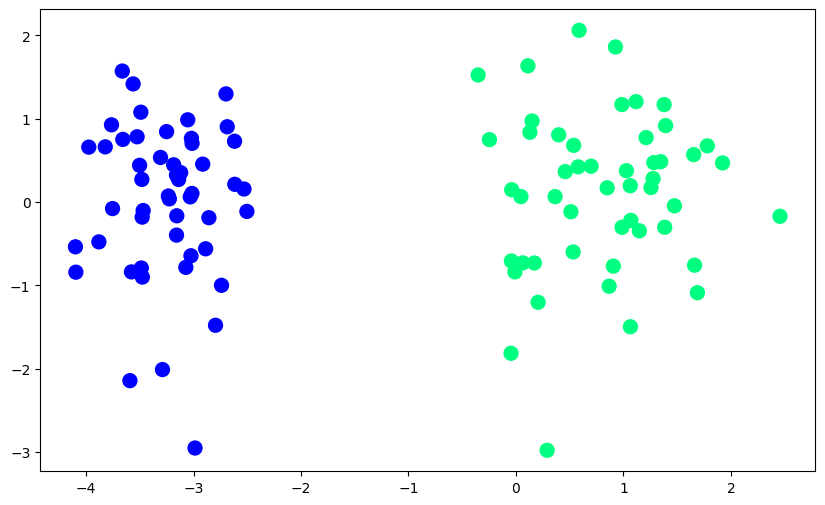

In [3]:
plt.figure(figsize=(10,6))
plt.scatter(X[:,0],X[:,1],c=y,cmap='winter',s=100)




In [4]:
from sklearn.linear_model import LogisticRegression 
lor=LogisticRegression(penalty='none',solver='sag')


In [5]:
lor.fit(X,y)

c:\Users\Ashish Gupta\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:1182: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
c:\Users\Ashish Gupta\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


LogisticRegression(penalty='none', solver='sag')

In [7]:
print(lor.coef_)
print(lor.intercept_)

[[4.80789358 0.21366984]]
[5.77867577]


In [8]:
m1 = -(lor.coef_[0][0]/lor.coef_[0][1])
b1 = -(lor.intercept_/lor.coef_[0][1])

In [9]:
m1

-22.501508268953586

In [10]:
b1

array([-27.0448833])

In [11]:
x_input = np.linspace(-3,3,100)
y_input = m1*x_input + b1

In [12]:
x_input

array([-3.        , -2.93939394, -2.87878788, -2.81818182, -2.75757576,
       -2.6969697 , -2.63636364, -2.57575758, -2.51515152, -2.45454545,
       -2.39393939, -2.33333333, -2.27272727, -2.21212121, -2.15151515,
       -2.09090909, -2.03030303, -1.96969697, -1.90909091, -1.84848485,
       -1.78787879, -1.72727273, -1.66666667, -1.60606061, -1.54545455,
       -1.48484848, -1.42424242, -1.36363636, -1.3030303 , -1.24242424,
       -1.18181818, -1.12121212, -1.06060606, -1.        , -0.93939394,
       -0.87878788, -0.81818182, -0.75757576, -0.6969697 , -0.63636364,
       -0.57575758, -0.51515152, -0.45454545, -0.39393939, -0.33333333,
       -0.27272727, -0.21212121, -0.15151515, -0.09090909, -0.03030303,
        0.03030303,  0.09090909,  0.15151515,  0.21212121,  0.27272727,
        0.33333333,  0.39393939,  0.45454545,  0.51515152,  0.57575758,
        0.63636364,  0.6969697 ,  0.75757576,  0.81818182,  0.87878788,
        0.93939394,  1.        ,  1.06060606,  1.12121212,  1.18

In [13]:
y_input

array([ 40.4596415 ,  39.09591373,  37.73218596,  36.36845818,
        35.00473041,  33.64100264,  32.27727486,  30.91354709,
        29.54981931,  28.18609154,  26.82236377,  25.45863599,
        24.09490822,  22.73118044,  21.36745267,  20.0037249 ,
        18.63999712,  17.27626935,  15.91254158,  14.5488138 ,
        13.18508603,  11.82135825,  10.45763048,   9.09390271,
         7.73017493,   6.36644716,   5.00271938,   3.63899161,
         2.27526384,   0.91153606,  -0.45219171,  -1.81591949,
        -3.17964726,  -4.54337503,  -5.90710281,  -7.27083058,
        -8.63455835,  -9.99828613, -11.3620139 , -12.72574168,
       -14.08946945, -15.45319722, -16.816925  , -18.18065277,
       -19.54438055, -20.90810832, -22.27183609, -23.63556387,
       -24.99929164, -26.36301941, -27.72674719, -29.09047496,
       -30.45420274, -31.81793051, -33.18165828, -34.54538606,
       -35.90911383, -37.27284161, -38.63656938, -40.00029715,
       -41.36402493, -42.7277527 , -44.09148048, -45.45

In [16]:
def gd(X,y):
    
    X = np.insert(X,0,1,axis=1)
    weights = np.ones(X.shape[1])
    lr = 0.5
    
    for i in range(5000):
        y_hat = sigmoid(np.dot(X,weights))
        weights = weights + lr*(np.dot((y-y_hat),X)/X.shape[0])
        
    return weights[1:],weights[0]
        

In [17]:
def sigmoid(z):
    return 1/(1 + np.exp(-z))


In [18]:
coef_,intercept_ = gd(X,y)

In [19]:
m = -(coef_[0]/coef_[1])
b = -(intercept_/coef_[1])

In [20]:
x_input1 = np.linspace(-3,3,100)
y_input1 = m*x_input1 + b

(-3.0, 2.0)

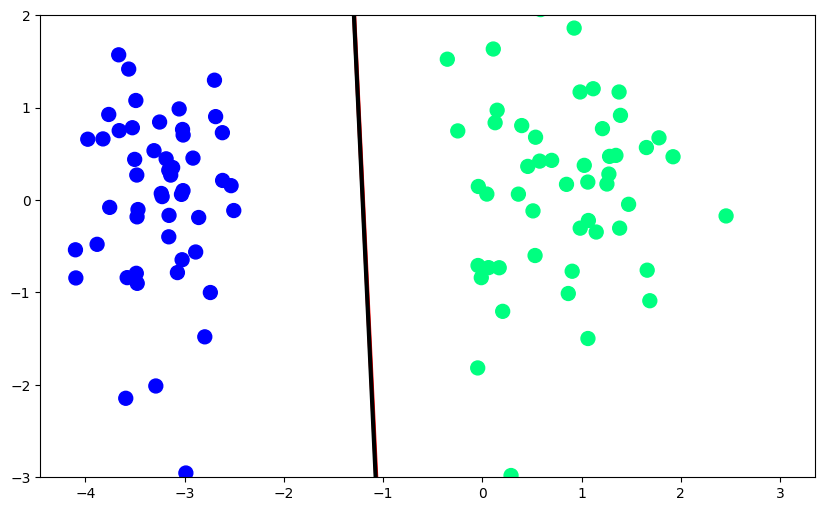

In [21]:
plt.figure(figsize=(10,6))
plt.plot(x_input,y_input,color='red',linewidth=3)
plt.plot(x_input1,y_input1,color='black',linewidth=3)
plt.scatter(X[:,0],X[:,1],c=y,cmap='winter',s=100)
plt.ylim(-3,2)